In [1]:
import pandas as pd
import os
from tqdm import tqdm
from utils import avg, evidence_to_mask, text_len_scatter

def to_data_df(df, data_dir):
    data_df = []
    columns = ['text', 'classification', 'rationale' ,'query']
    for i in tqdm(range(len(df))):
        df_row = df.loc[i]
        
        doc_id = df_row['annotation_id']
        query = df_row['query']
        evidence_list = df_row['evidences']
        if evidence_list:
            evidence_list = evidence_list[0]
        classification = df_row['classification']
        
        text = ''
        file = f'{data_dir}/docs/{doc_id}'
        if os.path.isfile(file):
            f = open(file, 'r', encoding="utf-8") 
            for line in f.readlines():
                text += line.rstrip() + ' '
        else:
            print("???")
            print(file)
            quit()
        
        tokens = text.split()
        rationale_mask = evidence_to_mask(tokens, evidence_list)
        
        # joining text and query with [SEP]
#         QA = f"{text}"
#         QA = f"{text}[SEP] {query}"
#         QA = f"{query} [SEP] {text}"
        
        QA = text
        rationale_mask = rationale_mask
    
        data_df.append([QA, classification, rationale_mask, query])
    data_df = pd.DataFrame(data_df, columns=columns)
#     return data_df
    
    data_df_shuffled=data_df.sample(frac=1).reset_index(drop=True)
    return data_df_shuffled

In [2]:
dataset = "movies"

In [3]:
data_dir = f'../data/{dataset}'
train = pd.read_json(f'{data_dir}/train.jsonl', lines=True)
test = pd.read_json(f'{data_dir}/test.jsonl', lines=True)
val = pd.read_json(f'{data_dir}/val.jsonl', lines=True)

In [4]:
train_data_df = to_data_df(train, data_dir)
# train_data_df.to_csv(f"{dataset}/train.csv",index_label="id")
test_data_df = to_data_df(test, data_dir)
# test_data_df.to_csv(f"{dataset}/test.csv",index_label="id")
val_data_df = to_data_df(val, data_dir)
# val_data_df.to_csv(f"{dataset}/val.csv",index_label="id")

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1625.49it/s]


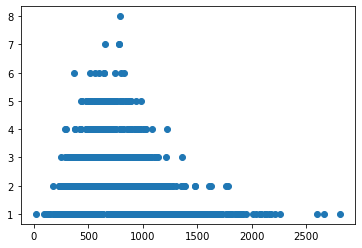

In [5]:
d = text_len_scatter(train_data_df,test_data_df,val_data_df)

In [6]:
d

{945: 4,
 315: 2,
 871: 5,
 797: 4,
 1450: 1,
 781: 3,
 748: 2,
 708: 3,
 805: 5,
 726: 2,
 843: 5,
 762: 2,
 693: 3,
 424: 4,
 312: 2,
 876: 2,
 677: 4,
 1046: 2,
 1568: 1,
 914: 3,
 810: 2,
 1395: 1,
 577: 1,
 934: 2,
 746: 4,
 317: 3,
 740: 1,
 703: 4,
 560: 5,
 1264: 1,
 732: 4,
 2082: 1,
 553: 1,
 643: 4,
 747: 1,
 514: 2,
 516: 6,
 622: 3,
 1221: 4,
 913: 1,
 561: 4,
 283: 1,
 567: 4,
 585: 3,
 707: 3,
 526: 4,
 299: 4,
 893: 5,
 983: 2,
 247: 1,
 968: 4,
 733: 4,
 273: 1,
 949: 2,
 795: 4,
 725: 4,
 689: 4,
 793: 4,
 382: 4,
 742: 6,
 1265: 1,
 476: 5,
 956: 4,
 931: 4,
 685: 2,
 721: 2,
 715: 3,
 637: 3,
 450: 2,
 384: 2,
 1496: 1,
 653: 4,
 442: 5,
 830: 2,
 1268: 1,
 1205: 2,
 656: 5,
 1028: 2,
 565: 5,
 522: 3,
 1202: 1,
 574: 1,
 730: 3,
 573: 1,
 768: 3,
 368: 6,
 1233: 1,
 943: 4,
 910: 2,
 478: 4,
 644: 3,
 804: 1,
 1128: 2,
 1072: 3,
 845: 3,
 866: 2,
 1044: 2,
 719: 1,
 937: 5,
 787: 3,
 532: 3,
 873: 5,
 525: 2,
 799: 2,
 531: 2,
 1617: 1,
 584: 1,
 887: 4,
 646: 2,
 

In [58]:
t = test_data_df.iloc[0]

In [59]:
te = t['text'].split()
for i, b in enumerate(t['rationale']):
    if b:
        print(te[i])

i
even
giggled
something
about
these
films
causes
me
to
lower
my
inhibitions
and
return
to
the
saturday
afternoons
of
my
does
n't
quite
pass
the
test
.
sure
enough
too
-
cheesy
-
to
-
be
-
accidental
noteworthy
primarily
for
the
mechanical
manner
in
which
it
's
hard
to
work
up
much
enthusiasm
for
this
sort
of
joyless
film
-
making
,
especially
when
a
monster
moview
should
make
you
laugh
every
time
it
makes
you
scream
deep
rising
is
missing
that
one
unmistakable
cue
that
we
're
expected
to
have
a
ridiculous
good
time
,
not
hide
our
eyes
deep
rising
has
anaconda
beat
all
to
heck
when
it
comes
to
technical
proficiency
and
pacing
.
it
's
also
gloomy
,
uninspired
and
not
nearly
enough
i
do
n't
ask
much
of
my
monster
movies
,
but
i
do
ask
that
they
act
like
monster
movies
.
you
do
n't
have
to
show
me
a
fantastically
impressive
,
massive
beast
with
tentacles
a
-
flailing
.
just
show
me
the
massive
beast
burping
,
and
i
'll
figure
you
get
the


In [38]:
def generate_class_stats(train_df, test_df, val_df):
    text_lens_0 = []
    text_lens_1 = []
    rationale_lens_0 = []
    rationale_lens_1 = []
    rationale_percent_0 = []
    rationale_percent_1 = []
    class_distribution = [0,0]
    for df in [train_df, test_df, val_df]:
        for i in range(len(df)):
            df_row = df.loc[i]
            clas = df_row['classification']
            text = df_row['text']
            rationale = df_row['rationale']
            text_len = len(text.split())
            rationale_len = rationale.count(1)
            rationale_percent = rationale_len/text_len
            if clas == "NEG":
                text_lens_0.append(text_len)
                rationale_lens_0.append(rationale_len)
                rationale_percent_0.append(rationale_percent)
                class_distribution[0] += 1
            else:
                text_lens_1.append(text_len)
                rationale_lens_1.append(rationale_len)
                rationale_percent_1.append(rationale_percent)
                class_distribution[1] += 1
    return text_lens_0,text_lens_1,rationale_lens_0,rationale_lens_1,rationale_percent_0,rationale_percent_1,class_distribution

In [39]:
text_lens_0,text_lens_1,rationale_lens_0,rationale_lens_1,rationale_percent_0,rationale_percent_1,class_distribution = generate_class_stats(train_data_df,test_data_df,val_data_df)
text_lens_all = text_lens_0 + text_lens_1
rationale_lens_all = rationale_lens_0 + rationale_lens_1
rationale_percent_all = rationale_percent_0 + rationale_percent_1
class_distr = [class_distribution[0]/sum(class_distribution),class_distribution[1]/sum(class_distribution)]

In [40]:
for l in [rationale_lens_all,text_lens_all,rationale_percent_all,text_lens_0,text_lens_1,rationale_lens_0,rationale_lens_1,rationale_percent_0,rationale_percent_1]:
    print(avg(l))

30.925462731365684
774.2696348174087
0.04227329387265028
731.786
816.7957957957958
36.84
25.005005005005007
0.052422732743648545
0.03211369540318255


In [60]:
class_distr

[0.5002501250625313, 0.49974987493746875]